In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [8]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [9]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [10]:
for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
    axis = 0)

    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
    axis = 0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold # 0


/home/stlso/tf_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744991576.950033   27363 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1519 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 4GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1744991577.878690   30222 service.cc:152] XLA service 0x7fe38c008400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744991577.878716   30222 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 4GB Laptop GPU, Compute Capability 8.6
2025-04-18 10:52:57.904051: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] d

Processing fold # 1
Processing fold # 2
Processing fold # 3


In [11]:
all_scores

[2.427394151687622, 2.464055299758911, 3.1554296016693115, 2.70462965965271]

In [12]:
np.mean(all_scores)

np.float64(2.6878771781921387)

In [14]:
num_epochs = 200
all_mae_histories = []

for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
    axis = 0)

    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
    axis = 0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data, val_targets), epochs = num_epochs, batch_size = 1, verbose = 1)

    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing fold # 0
Epoch 1/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 473.3583 - mae: 18.4234 - val_loss: 40.6378 - val_mae: 3.9251
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34.8975 - mae: 4.1720 - val_loss: 25.4181 - val_mae: 3.3944
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.5628 - mae: 3.2535 - val_loss: 20.1245 - val_mae: 2.9066
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.1200 - mae: 3.2173 - val_loss: 17.4401 - val_mae: 2.7864
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.8872 - mae: 2.7909 - val_loss: 17.2201 - val_mae: 2.8185
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.5458 - mae: 3.0054 - val_loss: 14.6824 - val_mae: 2.3715
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.5651 - mae: 2.2897 - val_loss: 12.8568 - val_mae: 2.3690
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.2144 - mae: 2.5241 - val_loss: 11.4911 - val_mae: 2.1733
Epoch 9/200

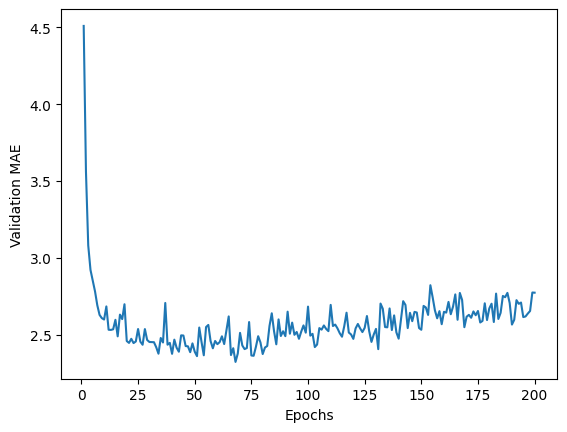

In [15]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()



In [16]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [17]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

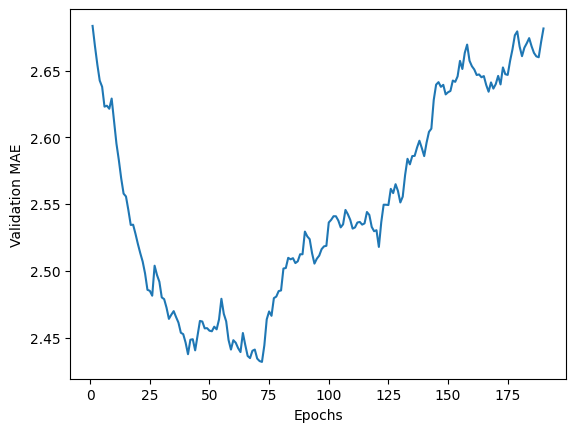

In [18]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [31]:
model = build_model()

model.fit(train_data, train_targets, epochs=73, batch_size=16, verbose = 1)
test_mse_score, test_mae_score, = model.evaluate(test_data, test_targets)

Epoch 1/73
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 500.8668 - mae: 20.6795
Epoch 2/73
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 385.6671 - mae: 17.4653
Epoch 3/73
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 202.5353 - mae: 11.8019
Epoch 4/73
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.1753 - mae: 6.8180
Epoch 5/73
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.2212 - mae: 5.3288
Epoch 6/73
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.7131 - mae: 4.2718
Epoch 7/73
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.5002 - mae: 3.3934
Epoch 8/73
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.4281 - mae: 3.1269
Epoch 9/73
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.9081 - mae: 2.9820
Epoch 10/73
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.3974 - mae: 2.9436
Epoch 11/73
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.1378 - mae: 2.6647
Epoch 12/73
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.3583 - mae: 2.5817
Epoch 13/73
26/26 ━━━━━━━━━━━━

In [32]:
test_mae_score

2.6411614418029785